<h1 style="text-align: center;margin:-7px">Machine Learning Assigment 2</h1>
<h2 style="text-align: center;">Assignment 2: Implement Logistic Regression from scratch</h2>
<h3 style="text-align: center;margin:7px">Student ID: 20231272</h3>
<h3 style="text-align: center;margin:3px">Student Name: Kollapudi Nagendra Dheeraj</h3>

In [1]:
#Basic File and Matrix Vectorized programming imports
import pandas as pd
import numpy as np

#Standard Imports for Doing Train Test Split and Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Reference ML Package along with the functions
from sklearn.linear_model import LogisticRegression

#For performing High Quality Tests
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

#For Flattening the List and Data Visualization
from itertools import cycle, chain

#For Visualization
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

In [2]:
cols = ['calorific_value', 'nitrogen', 'turbidity', 'Style', 'alcohol', 'sugars', 'bitterness', 'beer_id', 'colour', 'degree_of_fermentation']
    
df = pd.read_csv('beer.txt',sep='\t', header=None, names=cols)
df.head()

,calorific_value,nitrogen,turbidity,Style,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
0,41.721239,0.503276,2.628182,ale,4.015385,16.73,10.452789,93,13.44,55.337143
1,42.429204,0.525512,1.776364,ale,4.092308,16.72,10.999526,103,12.24,58.380000
2,45.880531,0.443233,2.628182,ale,4.276923,16.68,13.456368,178,10.92,58.382857
3,45.305310,0.471668,1.806364,ale,4.126154,18.84,9.202737,166,10.92,58.525714
4,38.977876,0.392846,2.272727,ale,4.015385,16.77,9.457895,44,10.56,58.900000


# Extract Features and Labels for Processing

In [3]:
#Extracting Style column as it is the column of interest for the algo 
##to detect the label of these values
y = df['Style'].values

#Extract all the other columns expect Style - label that the algo must identify 
##and beer_id doesn't add much info
X = df.drop(['Style','beer_id'],axis=1).values

print(X.shape)
print(y.shape)

(154, 8)
(154,)


# Perform Feature Scaling over X values

\begin{equation}
\mu = \frac{1}{N} \sum_{i=1}^N (X_i) 
\end{equation}

\begin{equation}
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (X_i - \mu)^2} 
\end{equation}

\begin{equation}
z = \frac{x - \mu}{\sigma} 
\end{equation}

\begin{align*}
 \text{where:}~  X_i &= \text{column-wise values,} \\
      \mu &= \text{Mean or Average value of X,} \\
      \sigma &= \text{Standard Deviation of the X,} \\
      z &= \text{Normalized Value of X - these values lie in the range of (0-1)} \\
\end{align*}

In [4]:
#Calculate the mean - column wise
mean = np.mean(X, axis=0) 

#Calculate the standard deviation - column wise
sd = np.std(X, axis=0) 

#Implement the formula as shown above:
X = (X - mean) / sd

# LR Hypothesis

\begin{equation}
hypothesis = \frac{1}{1 + e^{-\theta^T x}}
\end{equation}

\begin{align*}
 \text{where:}~e &= \text{Exponential Power of the value,} \\
      \theta^T &= \text{vector of parameters or weights that are to be calculated,} \\
      x &= \text{x or feature values of the dataset} \\
\end{align*}

In [5]:
def hypothesis(x):
    return 1 / (1 + np.exp(-x))

# LR Gradient Descent

\begin{equation}
\theta^{new} = \theta^{old} - \alpha\frac{1}{m}\sum_{i=1}^m x_j^i(h_\theta(x^i) - y^i)
\end{equation}

\begin{align*}
 \text{where:}~ \alpha &= \text{learning rate,} \\
      m &= \text{length of the y input,} \\
      x_j^i &= \text{value of the X per } i^{th} \text{row and } j^{th} \text{col,} \\
      h_\theta(x^i) &= \text{hypothesis or the sigmoid value calculated with X and empty } \theta \text{ vector,} \\
      y^i & = \text{y or label values of the dataset} \\
\end{align*}

In [6]:
def gradient_descent(X, Y, theta, epochs):
    
    for i in range(epochs):
        #Computing h_theta(x) part of the code
        h = hypothesis(np.dot(X,theta))

        #Calculating the second part of the equation without the learning rate
        gradient_value = (1/len(Y)) * np.dot(X.T, (h - Y))

        # Combining the formula
        theta -= 0.001 * gradient_value
    return theta

# LR Fit

<h3> Here we are trying to get the theta values for each class across features </h3>

\begin{equation}
\theta[3{classes}, 8{features}] = 
\begin{bmatrix}
\theta_1^1 & \theta_2^1 & \theta_3^1 & \theta_4^1 & \theta_5^1 & \theta_6^1 & \theta_7^1 & \theta_8^1 \\
\theta_1^2 & \theta_2^2 & \theta_3^2 & \theta_4^2 & \theta_5^2 & \theta_6^2 & \theta_7^2 & \theta_8^2 \\
\theta_1^3 & \theta_2^3 & \theta_3^3 & \theta_4^3 & \theta_5^3 & \theta_6^3 & \theta_7^3 & \theta_8^3 \\
\end{bmatrix}
\end{equation}

\begin{align*}
 \text{where:}~ \text{we are iterating over:} \\
      & \text{1) each unique class of Y (label)} \\
      & \text{2) trying to fit theta for each unique label of Y} \\
      & \text{3) Along with that perform gradient descent to find the best possible fit the - } \\
                                   &\text{LR Parameters i.e. } h_\theta(x^i) = y^i\\
\end{align*}

In [7]:
def fit(X_LR, Y_LR, epochs = 10000):
    #Finding the unique values of Y so that looping for One vs Rest can done
    classes = np.unique(Y_LR)
    
    #Also finding the length of the X and Y values for reshaping of numpy wherever needed.
    num_classes = len(classes)
    num_features = X_LR.shape[1]
    
    #Initialize an empty numpy array of 3 * 8 blocks (as per this dataset)
    theta = np.empty([num_classes, num_features])

    #Performing One vs Rest Implementation
    #Iterate over each class along with index over the unique classes
    for index, label_class in enumerate(classes):

        #Mapping the non-label_class value to 0 and label_class value to 1 and shaping it to required dimensions
        y_one_vs_rest = np.where(Y_LR == label_class, 1, 0).reshape((len(Y_LR), 1))

        #Initialize Gradient Descent with 0's and pass it to the numpy array created above per unique class
        theta[index] = gradient_descent(X_LR, y_one_vs_rest, np.zeros((num_features, 1)), epochs).reshape(num_features)
    
    return theta

# LR Predictions

\begin{equation}
\text{prediction of X record = index of the} \max{(hypothesis(x * \theta^{T}) = \begin{bmatrix}
\theta_1^1 & \theta_2^1 & \theta_3^1 
\end{bmatrix})}
\end{equation}

\begin{align*}
 \text{where:}~ hypothesis &= \text{Hypothesis of the LR i.e. sigmoid function} \\
      x &= \text{test data or unseen data} \\
      \theta^T &= \text{theta values fitted during training phase} \\
  \text{prediction}~ &= \text{Maximum of the probabilities returned by the list} \\
\end{align*}

In [8]:
def predictions(theta, X):
    classes = np.unique(y)
    
    #Re-Computing Hypothesis, but here the thetas are is non-empty array but those which we have fitted earlier
    #unlike fit phase in empty []
    h = hypothesis(np.dot(X,theta.T))

    #Returning the class which has the highest hypothesis value
    return [classes[np.where(h[i] == max(h[i]))] for i in range(X.shape[0])]

# Referencing my Implementation against ML Package (Scikit Learn)

In [9]:
num_iter = 10
impl_lr_accuracy    = []
sklearn_lr_accuracy = []

y_preds = []
y_tests = []

y_preds_sklearn = []
y_tests_sklearn = []

#Open a file in the write mode to write the predictions into the system.
f = open('predictions.csv', 'w')

for iter in range(num_iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.67, shuffle = True)
    
    #Fit and Predicting the LR model over the train and test data split
    lr_thetas = fit(X_train, y_train)
    y_pred = predictions(lr_thetas, X_test)
    
    ##Finding accuracy and inputting it into the list so that it can plotted into the list
    impl_lr_accuracy.append(accuracy_score(y_test, y_pred))
    
    ###Appending pred and test values into list for generating confusion and classification reports
    y_preds.append(y_pred)
    y_tests.append(y_test)
    
    
    ## Writing the Implementation's Prediction into the File
    f.write("Iteration %s: Predictions\n##########################\n" %(iter+1))
    for pred, test_val in zip(y_pred, y_test):
        f.write("%s, %s" %(pred[0], test_val) + "\n")
    f.write("\n")

    
    #SkLearn Implementation of LR model over the train and test data split
    lr_model = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    
    ##Finding accuracy and inputting it into the list so that it can plotted into the list
    sklearn_lr_accuracy.append(accuracy_score(y_test, y_pred))
    
    ###Appending pred and test values into list for generating confusion and classification reports
    y_preds_sklearn.append(y_pred)
    y_tests_sklearn.append(y_test)
    
f.close()

In [10]:
#Printing final results
print('Mean Accuracy on implemented  LR Algo is', round(np.mean(impl_lr_accuracy),3))
print('Mean Accuracy on sklearn      LR Algo is', round(np.mean(sklearn_lr_accuracy),3))

#Adding the value into a DataFrame for better visualization
pd.DataFrame(list(zip(impl_lr_accuracy, sklearn_lr_accuracy)), 
             index=list(map(lambda x: 'Iteration '+str(x).zfill(2), np.arange(1, num_iter+1, 1))),
               columns =['Implementation Accuracies', 'SKLearn Accuracies'])

Mean Accuracy on implemented  LR Algo is 0.971
Mean Accuracy on sklearn      LR Algo is 0.961


,Implementation Accuracies,SKLearn Accuracies
Iteration 01,0.960784,0.941176
Iteration 02,0.960784,0.980392
Iteration 03,0.960784,0.941176
Iteration 04,0.960784,0.960784
Iteration 05,0.960784,0.941176
Iteration 06,1.000000,0.980392
Iteration 07,1.000000,1.000000
Iteration 08,0.960784,0.960784
Iteration 09,0.980392,0.960784
Iteration 10,0.960784,0.941176


# High quality and comprehensive tests

## Test 1: Accuracy vs Iteration

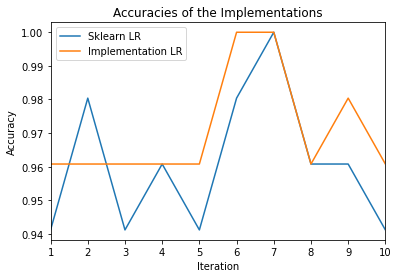

In [11]:
#Plotting SKLearn's and Implemented Accuracies list into plt function
plt.plot(range(1,num_iter+1), sklearn_lr_accuracy, label = 'Sklearn LR')
plt.plot(range(1,num_iter+1), impl_lr_accuracy, label = 'Implementation LR')

#MetaData for better understanding the plot
plt.title('Accuracies of the Implementations')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend()

#Adjusting the x axis
plt.xlim(1,10)
plt.xticks(np.arange(1, num_iter+1, 1))

plt.show()

## Test 2: Receiver Operating Characteristic Curve

In [12]:
y_tests = list(chain(*y_tests))
y_preds = np.concatenate(y_preds, 0).ravel().tolist()

y_tests_sklearn = list(chain(*y_tests_sklearn))
y_preds_sklearn = np.concatenate(y_preds_sklearn, 0).ravel().tolist()

In [13]:
#Function that creates ROC curve for multiclass using One vs Rest Implementation.
def roc_multiclass(y_test, y_pred, title):
    #Creating One Hot Vectors from the predicted and test values
    y_pred_One_Hot = pd.get_dummies(pd.DataFrame(y_pred))
    y_test_One_Hot = pd.get_dummies(pd.DataFrame(y_test))

    fpr = {}
    tpr = {}
    roc_auc = {}

    classes = np.unique(y_test)
    len_max_class = len(max(classes.ravel().tolist()))
    
    #As ROC Function doesn't consider multiclass so using One vs Rest Implementation as we did before to compute
    ##ROC for each unique class and finding roc_values and putting them into a dictionary
    for i in range(len(classes)):
        fpr[i], tpr[i], th = roc_curve(y_test_One_Hot.iloc[:, i], y_pred_One_Hot.iloc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Plotting each into the graph for visualization
    for i, color_label in zip(range(len(classes)), classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                label = 'ROC Curve for class {0} (area = {1:0.2f})'.format(color_label.rjust(len_max_class), roc_auc[i]))

    #Some meta data for better visualization
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc = 'lower right')

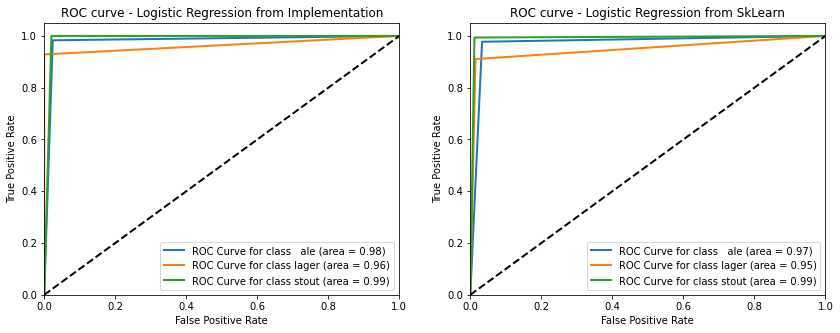

In [14]:
#Using Matplotlib subplots to display results side-by-side
fig = plt.figure(figsize=(14,5))

#calling the generated function
plt.subplot(1,2,1)
roc_multiclass(y_tests, y_preds, title = 'ROC curve - Logistic Regression from Implementation')

#calling the generated function
plt.subplot(1,2,2)
roc_multiclass(y_tests_sklearn, y_preds_sklearn, title = 'ROC curve - Logistic Regression from SkLearn')

plt.show()

## Test 3: Confusion Matrix

In [15]:
#Creating the confusion matrix that could display more values than sklearn's confusion_matrix function. Along with the 
## some other metrics like Precision, Recall, F1-Score etc.
def confusion_matrix_sns(y_test, y_pred, title):
    #Computing the confusion matrix from the y_test list and y_preds out of 0 iterations
    df_cm = confusion_matrix(y_test, y_pred)
    
    #Creating an empty list of data as per the size of the confusion matrix created
    group_labels = ['' for i in range(df_cm.size)]

    #I wanted to display count and percentages created 2 more arrays for exactly this purpose
    ##Calcuating the count already calculated by the matrix
    group_counts = ["{0:0.0f}\n".format(value) for value in df_cm.flatten()]
    
    ##Calculating the corresponding overall percentages
    group_percentages = ["{0:.2%}".format(value) for value in df_cm.flatten()/np.sum(df_cm)]

    ##Adding them as box labels seperated by new line that is done above
    box_labels = [f"{gl}{gc}{gp}".strip() for gl, gc, gp in zip(group_labels,group_counts,group_percentages)]
    
    ##Reshaping it as per the dimensions so that there would no broadcase error
    box_labels = np.asarray(box_labels).reshape(df_cm.shape[0],df_cm.shape[1])
    
    labels = np.unique(y_tests).ravel().tolist()
    ##Creating the Seaborn HeatMap from the data
    sns.heatmap(df_cm, annot=box_labels, cmap='Blues', fmt='', xticklabels=labels, yticklabels=labels)

    #Adding more data to the plot
    ##Computing the Accuracy
    accuracy  = np.trace(df_cm) / float(np.sum(df_cm))

    ##Calculating typical Precision, Recall, F1_score
    precision = df_cm[1,1] / sum(df_cm[:,1])
    recall    = df_cm[1,1] / sum(df_cm[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    
    ##Appending all of them to string
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
        accuracy,precision,recall,f1_score)

    ##Additional info to the plot for better visualization
    plt.ylabel('True label')
    plt.title(title)
    plt.xlabel('Predicted label'+stats_text)

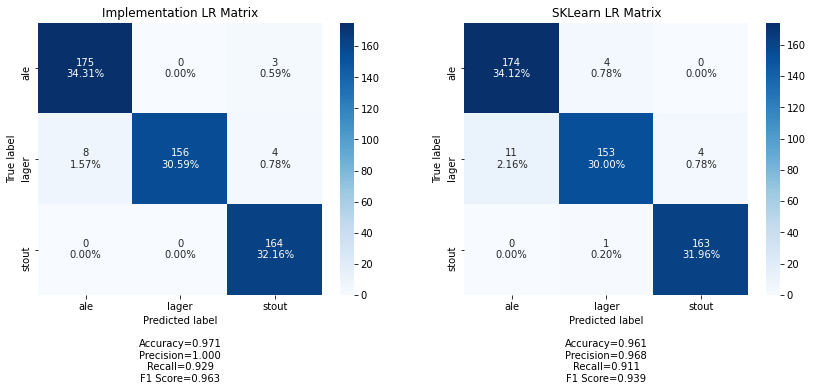

In [16]:
#Using Matplotlib subplots to display results side-by-side
fig = plt.figure(figsize=(14,5))

#calling the generated function
plt.subplot(1,2,1)
confusion_matrix_sns(y_tests, y_preds, title = 'Implementation LR Matrix')

#calling the generated function
plt.subplot(1,2,2)
confusion_matrix_sns(y_tests_sklearn, y_preds_sklearn, title = 'SKLearn LR Matrix')

plt.show()

## Test 4: Classification Report

In [17]:
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [18]:
#Creates the classification_report based on the input and creates a pandas DataFrame for better visualization
def classification_report_format(y_test, y_pred, title):
    report = classification_report(y_test, y_pred, output_dict=True)
    dfs = [pd.DataFrame(report)]

    return pd.concat(
        [df.rename(columns=lambda x: x.zfill(3)) for df in dfs],
        keys=[title],
        axis=0)

In [19]:
#calling the generated function
report_of_impl = classification_report_format(y_tests, y_preds, 'Implementation LR Classification Report')

#Display just takes the output and shows them side by side as I override the default css styling above
display(pd.DataFrame(report_of_impl).transpose())

#calling the generated function
report_of_sklearn = classification_report_format(y_tests_sklearn, y_preds_sklearn, 'SKLearn LR Classification Report')
display(pd.DataFrame(report_of_sklearn).transpose())

Implementation LR Classification Report                      \
                                           precision    recall  f1-score   
ale                                         0.956284  0.983146  0.969529   
lager                                       1.000000  0.928571  0.962963   
stout                                       0.959064  1.000000  0.979104   
accuracy                                    0.970588  0.970588  0.970588   
macro avg                                   0.971783  0.970572  0.970532   
weighted avg                                0.971579  0.970588  0.970445   

                          
                 support  
ale           178.000000  
lager         168.000000  
stout         164.000000  
accuracy        0.970588  
macro avg     510.000000  
weighted avg  510.000000

SKLearn LR Classification Report                                
                                    precision    recall  f1-score     support
ale                                  0.940541  0.977528  0.958678  178.000000
lager                                0.968354  0.910714  0.938650  168.000000
stout                                0.976048  0.993902  0.984894  164.000000
accuracy                             0.960784  0.960784  0.960784    0.960784
macro avg                            0.961648  0.960715  0.960741  510.000000
weighted avg                         0.961121  0.960784  0.960511  510.000000